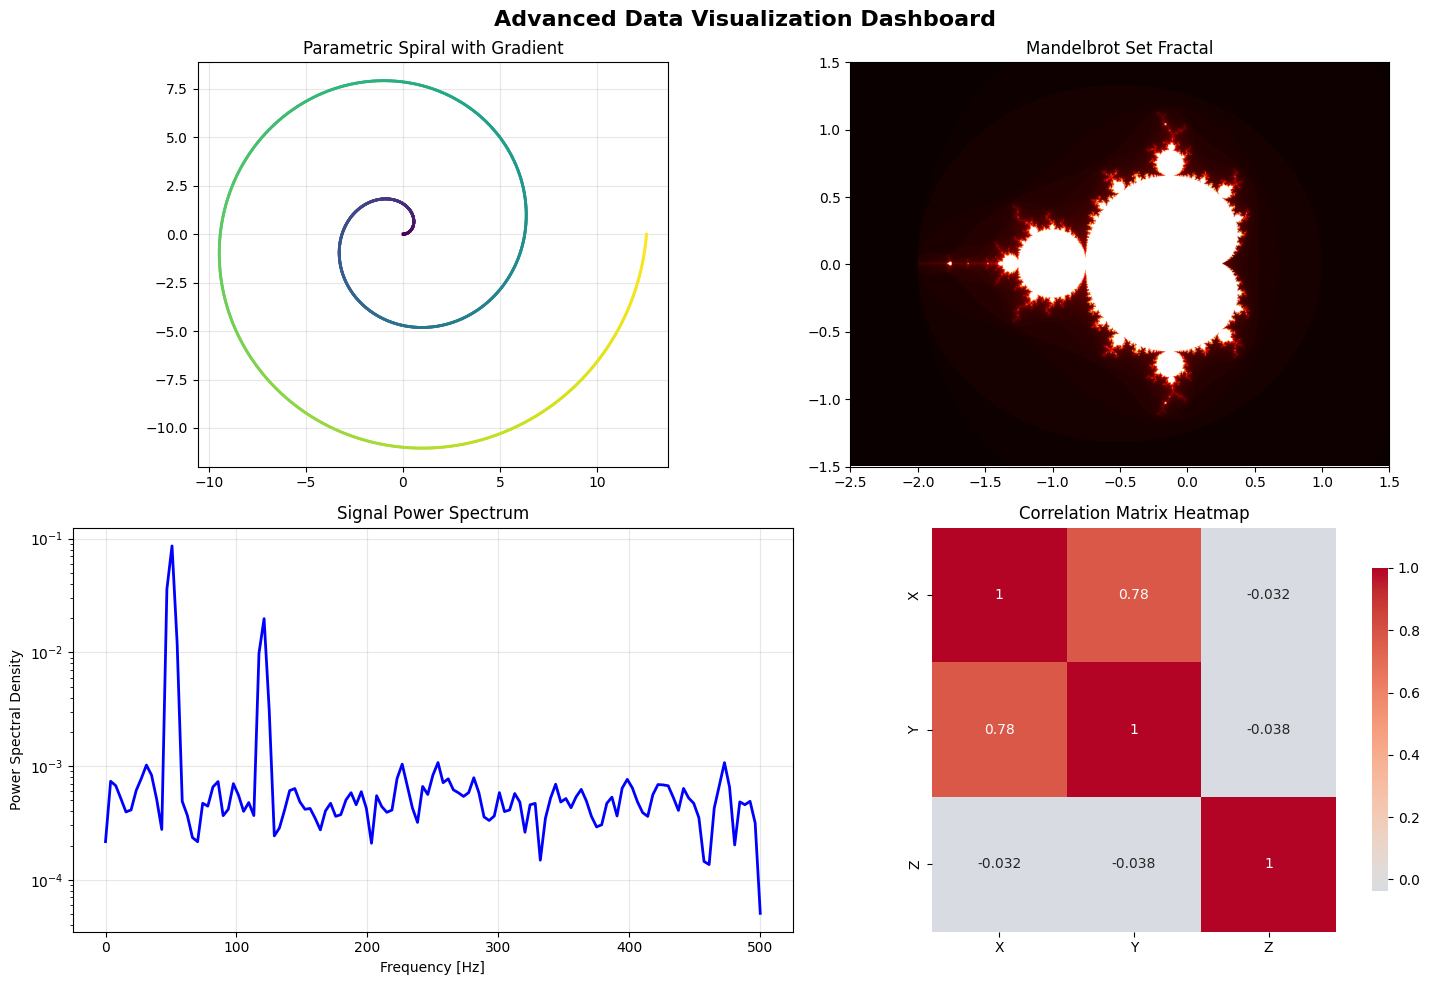

🚀 Advanced visualization complete!
📊 Generated 1000 data points for spiral
🔢 Mandelbrot set: 800x600 resolution
📈 Signal analysis: 1000Hz sampling rate
🔥 Correlation analysis: 1000 samples


In [4]:
import numpy as np
from matplotlib.animation import FuncAnimation
import seaborn as sns
from scipy import signal
import pandas as pd

import matplotlib.pyplot as plt

# Create a complex interactive visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Advanced Data Visualization Dashboard', fontsize=16, fontweight='bold')

# 1. 3D-like spiral with gradient
t = np.linspace(0, 4*np.pi, 1000)
x = t * np.cos(t)
y = t * np.sin(t)
colors = plt.cm.viridis(np.linspace(0, 1, len(t)))

for i in range(len(t)-1):
    ax1.plot(x[i:i+2], y[i:i+2], color=colors[i], linewidth=2)
ax1.set_title('Parametric Spiral with Gradient')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# 2. Fractal-like pattern
def mandelbrot(c, max_iter=100):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

width, height = 800, 600
xmin, xmax = -2.5, 1.5
ymin, ymax = -1.5, 1.5

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
C = X + 1j*Y

mandelbrot_set = np.zeros((height, width))
for i in range(height):
    for j in range(width):
        mandelbrot_set[i, j] = mandelbrot(C[i, j])

ax2.imshow(mandelbrot_set, extent=[xmin, xmax, ymin, ymax], 
           cmap='hot', origin='lower', interpolation='bilinear')
ax2.set_title('Mandelbrot Set Fractal')

# 3. Signal processing visualization
fs = 1000
t = np.linspace(0, 1, fs)
signal1 = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)
signal2 = signal1 + np.random.normal(0, 0.5, len(t))

f, Pxx = signal.welch(signal2, fs, nperseg=256)
ax3.semilogy(f, Pxx, 'b-', linewidth=2)
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Power Spectral Density')
ax3.set_title('Signal Power Spectrum')
ax3.grid(True, alpha=0.3)

# 4. Statistical heatmap with correlation
np.random.seed(42)
data = np.random.multivariate_normal([0, 0], [[1, 0.8], [0.8, 1]], 1000)
df = pd.DataFrame(data, columns=['X', 'Y'])
df['Z'] = df['X'] * df['Y'] + np.random.normal(0, 0.1, 1000)

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, ax=ax4, cbar_kws={'shrink': 0.8})
ax4.set_title('Correlation Matrix Heatmap')

plt.tight_layout()
plt.show()

print("🚀 Advanced visualization complete!")
print(f"📊 Generated {len(t)} data points for spiral")
print(f"🔢 Mandelbrot set: {width}x{height} resolution")
print(f"📈 Signal analysis: {fs}Hz sampling rate")
print(f"🔥 Correlation analysis: {len(df)} samples")